In [17]:
# ====================================
# 1. Cargar librerías
# ====================================
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score

In [18]:

# ====================================
# 2. Cargar datos
# ====================================
data = pd.read_csv("/Users/gabrielreyes/Downloads/beisbol.csv")
print("Primeras filas del dataset:")
display(data.head())

Primeras filas del dataset:


,Unnamed: 0,equipos,bateos,runs
0,0,Texas,5659,855
1,1,Boston,5710,875
2,2,Detroit,5563,787
3,3,Kansas,5672,730
4,4,St.,5532,762


In [19]:
# 3. Preprocesamiento
# Codificar variable categórica 'equipos'
# ====================================
data_encoded = pd.get_dummies(data, columns=["equipos"], drop_first=True)

# Variables predictoras (X) y objetivo (y)
X = data_encoded.drop("runs", axis=1)
y = data_encoded["runs"]

In [20]:
# ====================================
# 4. División en entrenamiento y prueba
# ====================================
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42
)


In [21]:
# ====================================
# 5. Elección y justificación del modelo
# Usaremos Regresión Lineal porque:
# - Relación lineal esperada entre bateos y runs
# - Fácil de interpretar
# - Rápido de entrenar
# ====================================
model = LinearRegression()
model.fit(X_train, y_train)

LinearRegression()

In [22]:
# ====================================
# 6. Predicciones y evaluación
# ====================================
y_pred = model.predict(X_test)

mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

print(f"Error cuadrático medio (MSE): {mse:.2f}")
print(f"Coeficiente de determinación (R²): {r2:.2f}")

Error cuadrático medio (MSE): 2846.07
Coeficiente de determinación (R²): 0.17


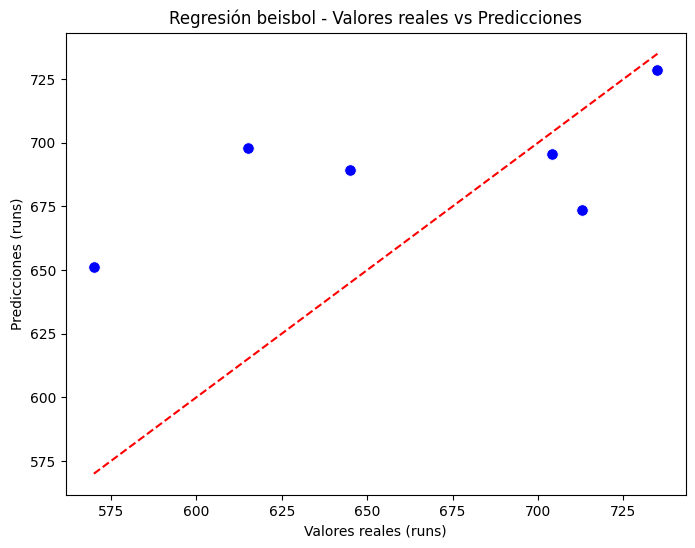

In [23]:
# ====================================
# 7. Visualización personalizada
# ====================================
plt.figure(figsize=(8,6))
sns.scatterplot(x=y_test, y=y_pred, color="blue", s=70)
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], 'r--')
plt.xlabel("Valores reales (runs)")
plt.ylabel("Predicciones (runs)")
plt.title("Regresión beisbol - Valores reales vs Predicciones")
plt.show()

In [24]:
# ====================================
# 8. Interpretación
# ====================================
print("Interpretación:")
print("- Un R² cercano a 1 indica que el modelo explica bien la variabilidad de runs.")
print("- Si el MSE es bajo, las predicciones están cerca de los valores reales.")

Interpretación:
- Un R² cercano a 1 indica que el modelo explica bien la variabilidad de runs.
- Si el MSE es bajo, las predicciones están cerca de los valores reales.
